# Reconocimiento Facial

In [1]:
#scikit-learn
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

In [3]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [4]:
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [5]:
print(faces.images.shape)

(1348, 62, 47)


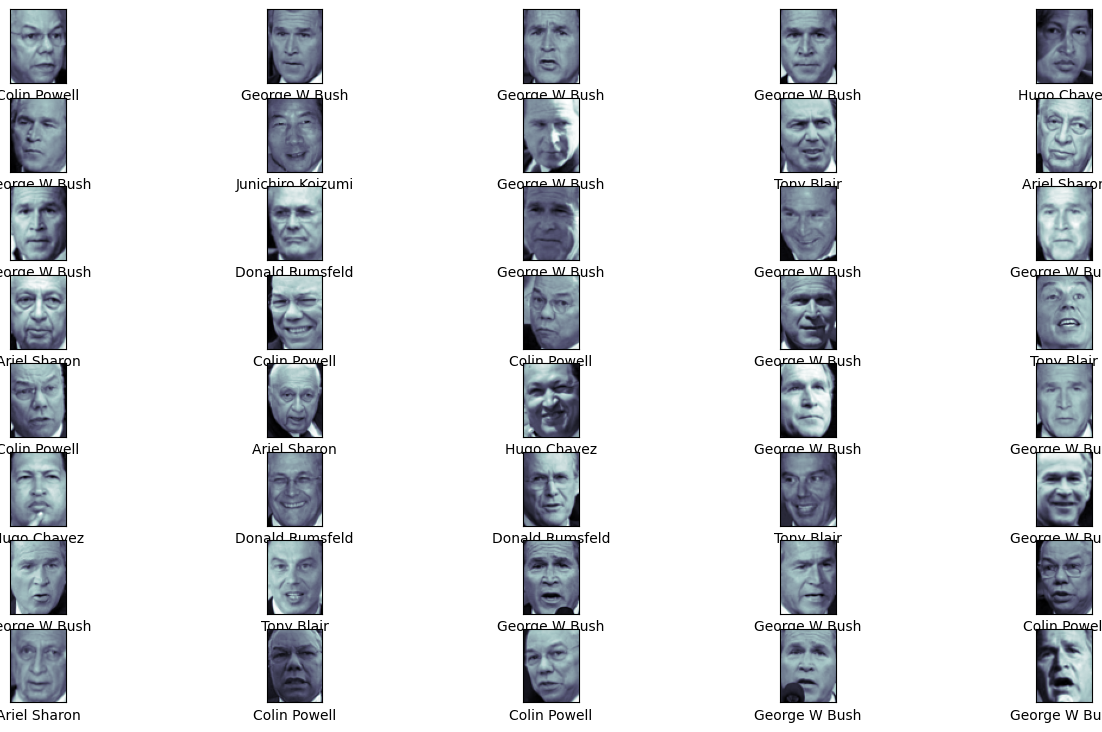

In [6]:
fig, ax = plt.subplots(8,5, figsize=(16,9))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(faces.images[i], cmap="bone")
    ax_i.set(xticks=[], yticks=[],xlabel=faces.target_names[faces.target[i]])

In [7]:
62*47#pixeles de altura por anchura 
#se puede utilizar cada pixel como clasificador pero primero se hacer preprocesado para identificar cuales son los mas importantes reduciendo a las mas importantes


2914

In [8]:
from sklearn.svm import SVC #
from sklearn.decomposition import PCA #RandomizedPCA #principal component analice
from sklearn.pipeline import make_pipeline #para encadenar instrucciones una despues de la otra

In [9]:
pca = PCA(n_components=150, whiten=True, random_state=42) #analsis por componentes principales con solo 150 pixeles
svc = SVC(kernel="rbf", class_weight="balanced")#obtiene rasgos circulares, balance pondera los que son mas importantes
model = make_pipeline(pca, svc)# el pipe line se especifica primero haciendo modelo de analosos por componentes principales y luego el super vector classifier

In [10]:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split # este es el viejo comando para importar el train.test.split

In [11]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(faces.data, faces.target, random_state = 42)

In [12]:
from sklearn.model_selection import GridSearchCV
#from sklearn.grid_search import GridSearchCV

In [13]:
#Opcion 2 se ajustan los parametros del modelo para encontrar los valores mas finos de manera que se minimice el error de  la clasificacion
param_grid = {
    "svc__C":[5.29,5.3,5.31,5.32,5.33,5.34], #estos son los parametros que se van a variar con un crossvalidation tipo parrilla que es una combinacion de todas las posibles convinaciones con los daros de la parrilla
    "svc__gamma":[0.00195, 0.002, 0.0021, 0.0022, 0.0023]
}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, Ytrain)

CPU times: total: 1min 6s
Wall time: 42.3 s


GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, random_state=42,
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [5.29, 5.3, 5.31, 5.32, 5.33, 5.34],
                         'svc__gamma': [0.00195, 0.002, 0.0021, 0.0022,
                                        0.0023]})

In [15]:
#Opcion 1 para detectar cuales son los valores de los parametros que mas se acercan
param_grid = {
    "svc__C":[0.1,1,5,10,50], #estos son los parametros que se van a variar con un crossvalidation tipo parrilla que es una combinacion de todas las posibles convinaciones con los daros de la parrilla
    "svc__gamma":[0.0001, 0.0005, 0.001, 0.005, 0.01]
}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, Ytrain)

CPU times: total: 56.2 s
Wall time: 38.5 s


GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, random_state=42,
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [0.1, 1, 5, 10, 50],
                         'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01]})

In [16]:
print(grid.best_params_)

{'svc__C': 5, 'svc__gamma': 0.001}


In [17]:
classifier = grid.best_estimator_#coge el mejor estimador
yfit = classifier.predict(Xtest)

Text(0.5, 0.98, 'Predicciones de las imágnes (incorrectas en rojo)')

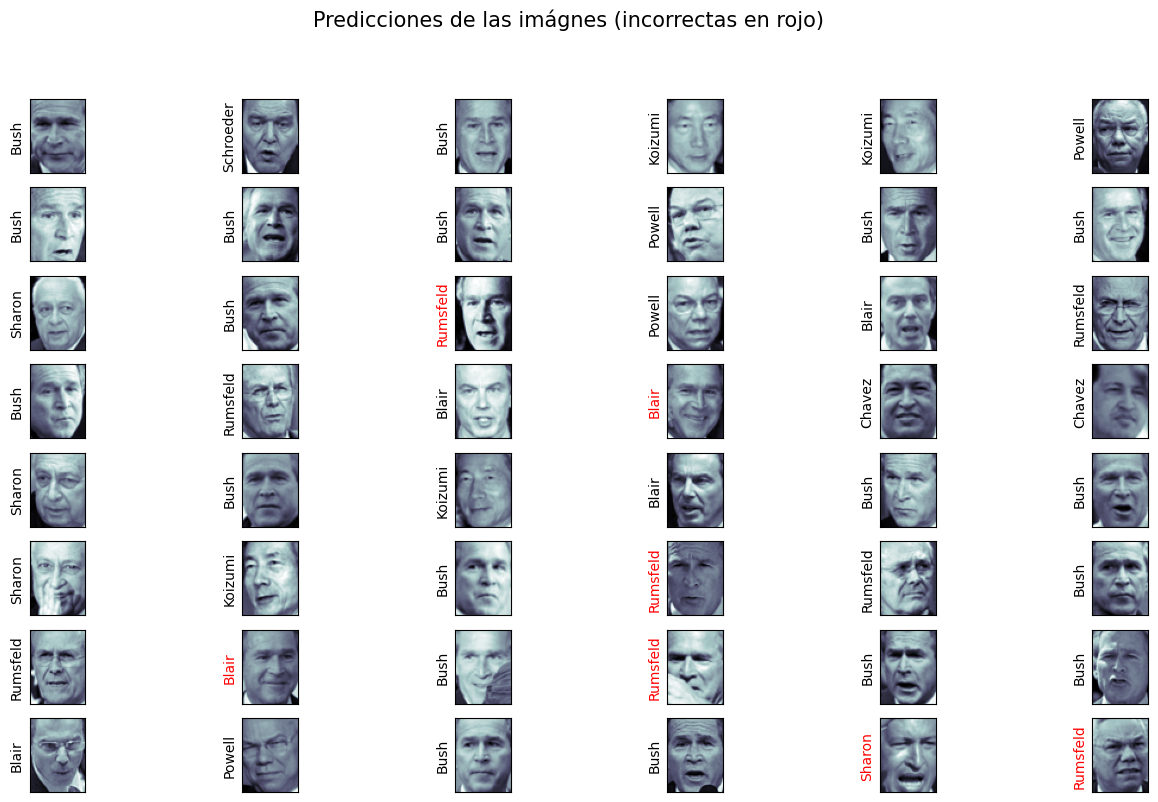

In [18]:
fig, ax = plt.subplots(8,6,figsize=(16,9))

for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(Xtest[i].reshape(62,47), cmap="bone")
    ax_i.set(xticks=[], yticks=[])
    ax_i.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color = "black" if yfit[i]==Ytest[i] else "red")#en esta parte esta el if que selecciona el color rojo en el subtitulo

fig.suptitle("Predicciones de las imágnes (incorrectas en rojo)", size = 15)

In [19]:
from sklearn.metrics import classification_report#listar estadisticos basicos

In [20]:
print(classification_report(Ytest, yfit, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
mat = confusion_matrix(Ytest, yfit)

In [60]:
import seaborn as sns; sns.set()#con esto se pueden hacer mapas de calor

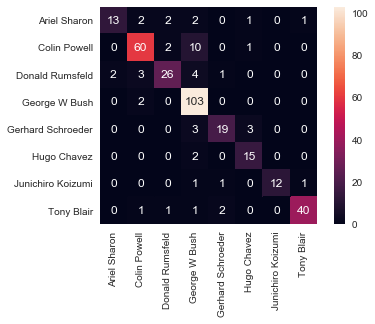

In [35]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=faces.target_names, yticklabels=faces.target_names )